In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [11]:
X, y = make_blobs(n_samples=100, centers=4, random_state=42)

In [24]:
# (y == 3).astype(int)

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

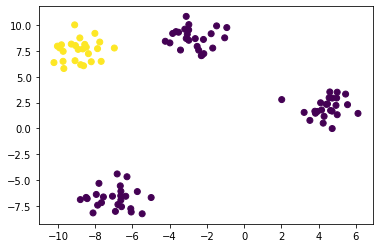

In [67]:
plt.scatter(X[:, 0], X[:, 1], c=(y==3).astype(int))

In [49]:
class CustomLosgisticReg:
    
    def __init__(self, lr=.01, iters=30):
        self.lr = lr
        self.iters = iters
        
    def fit(self, X, y):
        
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        
        self.classes_ = np.unique(y)
        
        thetas = []
        
        for klass in self.classes_:
        
                theta = np.random.randn(X.shape[1], 1)
                errors = []
            
                for i in range(self.iters):
                    error = self.gradient_decent(X, (y==klass).astype(int), theta)
                    errors.append(error)
                
                thetas.append(theta)
            
        self.thetas_ = np.hstack(thetas)

            
    def gradient_decent(self, X, y, theta):
        delta_theta, error = self.gradient(X, y, theta)
        theta += delta_theta
        return error
        
    def gradient(self, X, y, theta):
        ya =  y.reshape(-1, 1)
        yh = self.hypo(X, theta)
        
        dneglldt = np.dot(X.T, (yh-ya)) / X.shape[0]
        
        delta_theta = -dneglldt * self.lr
        
        error = -np.mean((ya * np.log(yh)) + ((1-ya)*(np.log(1-yh))))
        
        return delta_theta, error
        
        
    def hypo(self, X, theta):
        g = np.dot(X, theta)
        return 1 / (1 + np.exp(-g))
    
    def predict_prob(self, X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        return self.hypo(X, self.thetas_)
        
    def predict(self, X):
        probs = self.predict_prob(X)
        return probs.argmax(axis=1)
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)
        
        
        

In [50]:
model = CustomLosgisticReg(iters=1000)

In [51]:
model.fit(X, y)

In [52]:
model.thetas_

array([[-1.0073506 ,  0.4950404 , -0.36804622, -1.86705035],
       [ 0.12721141,  1.14859802, -0.33481767, -0.21110236],
       [ 0.19827638, -0.2751279 , -1.0402579 ,  0.11181102]])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [55]:
X.shape

(100, 2)

In [59]:
model = CustomLosgisticReg(lr=.1, iters=1000)

In [60]:
model.fit(X_train, y_train)

In [61]:
model.score(X_test, y_test)

1.0

In [62]:
model.thetas_

array([[-5.45051539, -0.57494347, -0.99739693, -5.83197558],
       [ 0.33964944,  1.92765188, -0.55338324, -0.66034941],
       [ 0.88526572, -0.24480191, -1.49954154,  0.24018576]])

In [63]:
model.predict_prob(X)

array([[2.66529723e-02, 1.05844918e-09, 1.27654732e-02, 8.76397596e-01],
       [4.16560643e-07, 3.42185019e-05, 9.99999507e-01, 2.24367249e-02],
       [8.80600455e-01, 1.73993188e-04, 1.14519147e-06, 1.72274436e-01],
       [4.37383752e-07, 1.11104209e-04, 9.99999471e-01, 1.47077858e-02],
       [2.05671138e-01, 6.49283430e-09, 2.95290822e-04, 8.40485203e-01],
       [4.06508284e-07, 8.98099362e-07, 9.99999508e-01, 8.14027460e-02],
       [2.40183530e-01, 9.99748002e-01, 2.82919813e-04, 2.23376799e-04],
       [1.31669708e-01, 9.99373803e-01, 9.69441601e-04, 2.77016617e-04],
       [2.24902277e-01, 9.99604948e-01, 3.25402410e-04, 2.60293619e-04],
       [8.34648033e-01, 4.87281951e-05, 2.14454774e-06, 2.38734527e-01],
       [8.30696593e-01, 1.67384110e-04, 2.28024302e-06, 1.64681417e-01],
       [3.22854182e-06, 5.94036962e-06, 9.99983965e-01, 5.85374332e-02],
       [1.45906316e-06, 1.34195229e-05, 9.99995850e-01, 3.86105319e-02],
       [2.75844657e-02, 9.97638978e-01, 1.60180828e